In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
Mall_Coustumer = pd.read_csv('/content/drive/MyDrive/Master_ML_From_Zero_To_Hero/Data/Mall_Customers.csv')

In [ ]:
Mall_Coustumer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data = Mall_Coustumer.drop('CustomerID', axis=1)

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

scaler = StandardScaler()
X_scale = scaler.fit_transform(data)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scale)


explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [1]:
# plt.figure(figsize=(6,4))
# plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
# plt.xlabel('Number Principal Components')
# plt.ylabel('Variance')
# plt.title('PCA – Explained Variance')
# plt.grid(True)
# plt.show()

In [ ]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(data.columns))],
                        index=data.columns)

print("Feature Importance (PCA Loadings):")
print(loadings)

Feature Importance (PCA Loadings):
                             PC1       PC2       PC3       PC4
Gender                  0.234302  0.626886  0.743009 -0.007405
Age                     0.687900 -0.103690 -0.122384  0.707859
Annual Income (k$)     -0.006082  0.765252 -0.643667  0.006721
Spending Score (1-100) -0.686920  0.103211  0.136573  0.706283


In [ ]:
Mall_Coustumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
Mall_Coustumer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
Mall_Coustumer.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


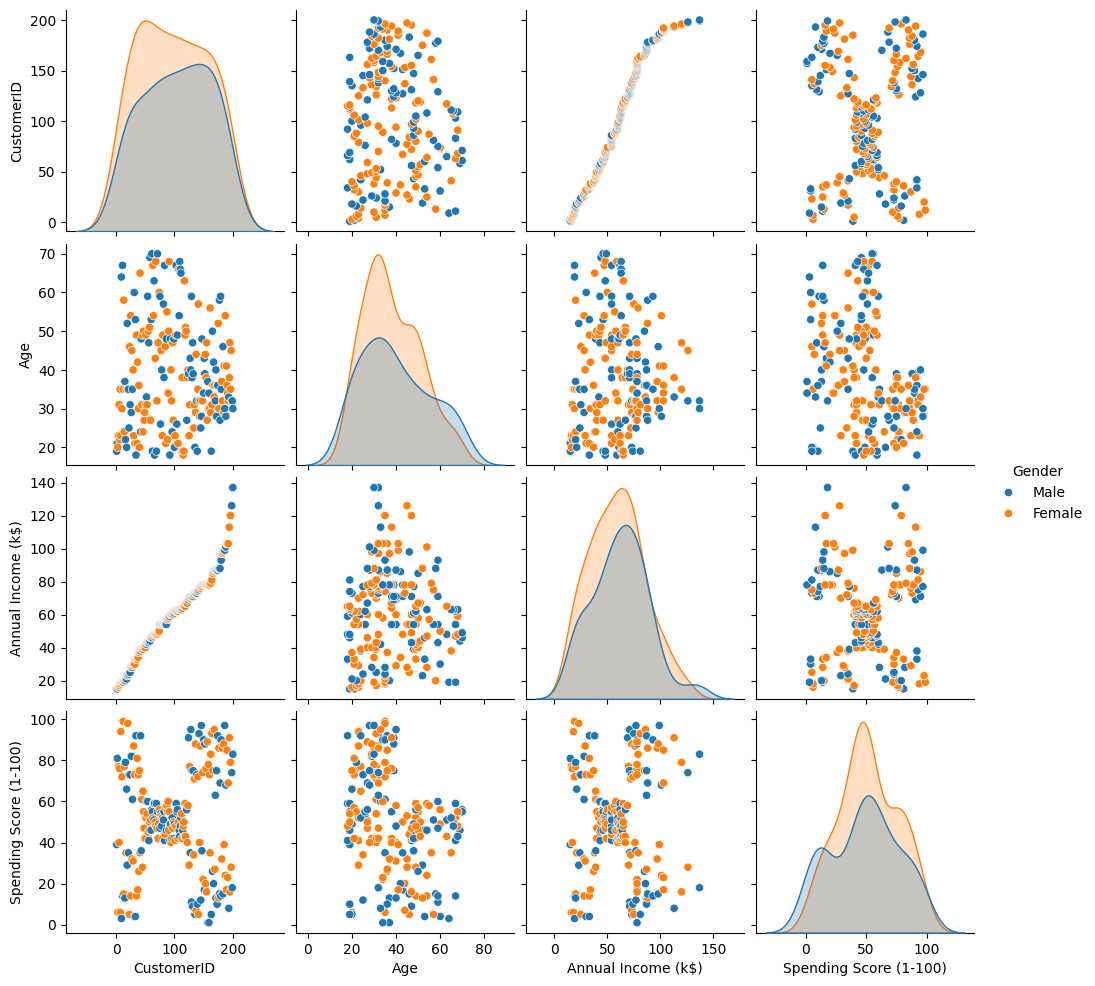

In [ ]:
sns.pairplot(Mall_Coustumer, hue='Gender')

In [ ]:
X= Mall_Coustumer[['Age','Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Feature Sample:\n", X_scaled[:5])

Scaled Feature Sample:
 [[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


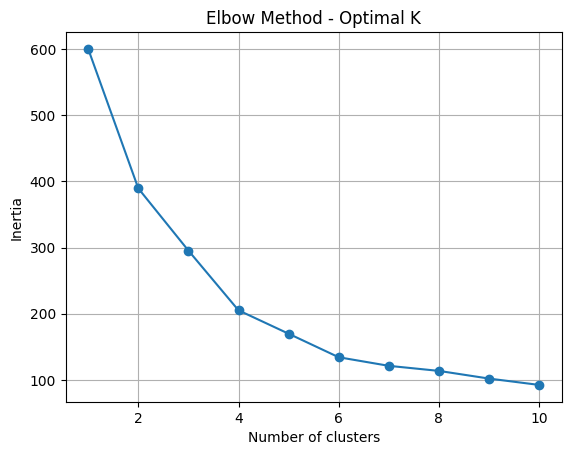

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

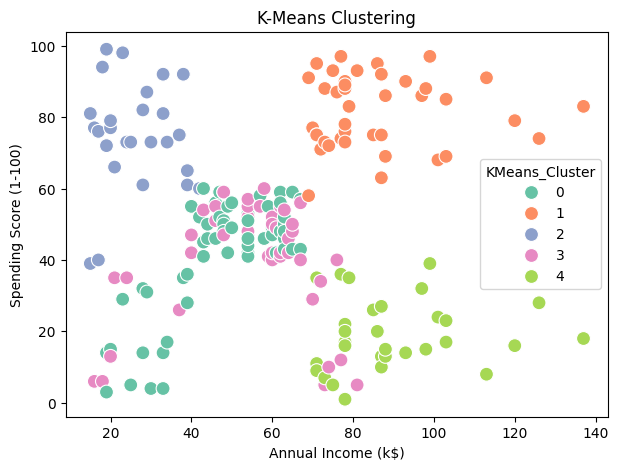

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
Mall_Coustumer['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=Mall_Coustumer['KMeans_Cluster'], palette='Set2', s=100)
plt.title('K-Means Clustering')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(X_scaled, Mall_Coustumer['KMeans_Cluster'])
print(f"Silhouette Score - K-Means: {kmeans_score:.3f}")

Silhouette Score - K-Means: 0.408


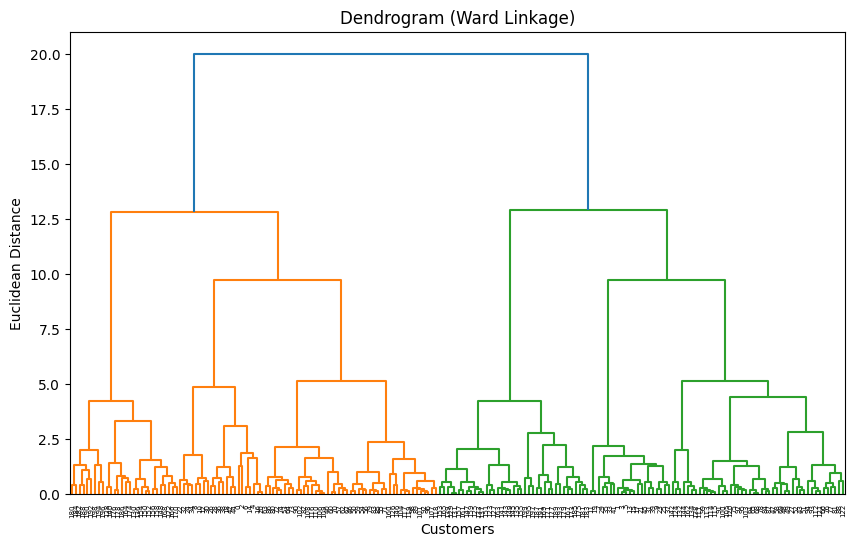

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(10,6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

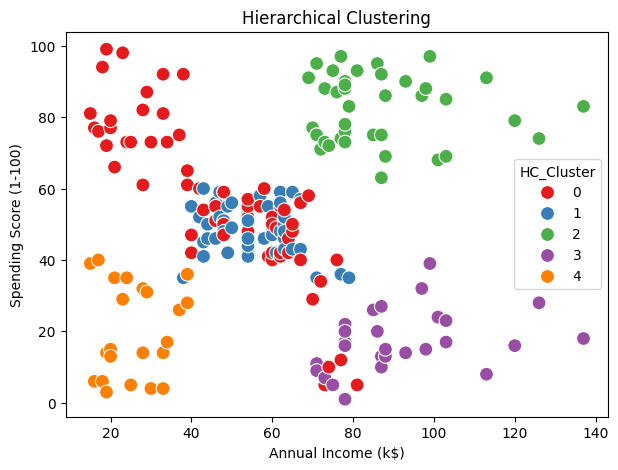

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
Mall_Coustumer['HC_Cluster'] = hc.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=Mall_Coustumer['HC_Cluster'], palette='Set1', s=100)
plt.title('Hierarchical Clustering')
plt.show()

In [ ]:
hc_score = silhouette_score(X_scaled, Mall_Coustumer['HC_Cluster'])
print(f"Silhouette Score - Hierarchical: {hc_score:.3f}")

Silhouette Score - Hierarchical: 0.390


In [ ]:
!pip install bayesian-optimization -q

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
def dbscan_silhouette(eps, min_samples):

    model = DBSCAN(eps=eps, min_samples=int(min_samples))
    labels = model.fit_predict(X_scaled)


    if len(set(labels)) <= 1:
        return -1
    score = silhouette_score(X_scaled, labels)
    return score

In [ ]:
pbounds = {
    'eps': (0.1, 2.0),
    'min_samples': (3, 15)
}


optimizer = BayesianOptimization(
    f=dbscan_silhouette,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

In [ ]:
optimizer.maximize(init_points=5, n_iter=15)


best_params = optimizer.max['params']
best_eps = best_params['eps']
best_min_samples = int(best_params['min_samples'])

print(f"\n Best epsilon: {best_eps:.4f}, Best min_samples: {best_min_samples}")


dbscan_opt = DBSCAN(eps=best_eps, min_samples=best_min_samples)
Mall_Coustumer['DBSCAN_Cluster'] = dbscan_opt.fit_predict(X_scaled)

|   iter    |  target   |    eps    | min_sa... |
-------------------------------------------------
| 1         | 0.1526305 | 0.8116262 | 14.408571 |
| 2         | -1.0      | 1.4907884 | 10.183901 |
| 3         | 0.1131102 | 0.3964354 | 4.8719342 |
| 4         | -1.0      | 0.2103588 | 13.394113 |
| 5         | 0.3131251 | 1.2421185 | 11.496870 |
| 6         | 0.3230071 | 1.2605965 | 11.485479 |
| 7         | -1.0      | 1.8510129 | 11.944638 |
| 8         | 0.3305189 | 1.0792466 | 12.443720 |
| 9         | 0.1389603 | 0.7373836 | 12.101058 |
| 10        | 0.2836271 | 0.9778396 | 11.085818 |
| 11        | -1.0      | 0.3280022 | 11.309358 |
| 12        | 0.3305189 | 1.2143123 | 14.770360 |
| 13        | -1.0      | 1.5023043 | 14.281970 |
| 14        | 0.2724098 | 0.8604101 | 5.4413813 |
| 15        | 0.2127431 | 0.8277477 | 14.954793 |
| 16        | 0.2724098 | 0.8630580 | 5.4431087 |
| 17        | -1.0      | 1.1809327 | 4.9015730 |
| 18        | 0.1001852 | 0.5694242 | 5.8498775 |


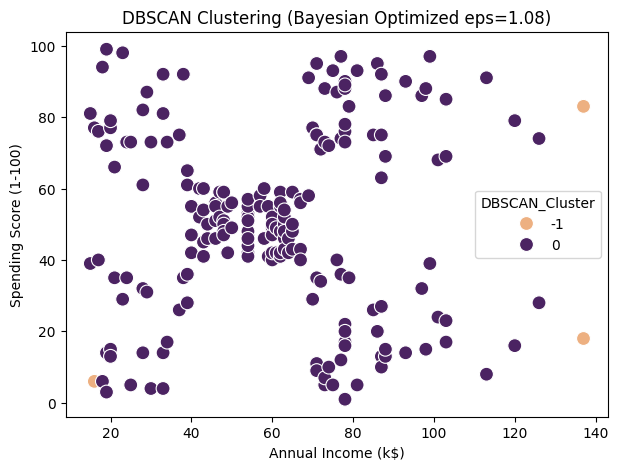

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=Mall_Coustumer['DBSCAN_Cluster'], palette="flare", s=100)
plt.title(f'DBSCAN Clustering (Bayesian Optimized eps={best_eps:.2f})')
plt.show()

In [ ]:
score = silhouette_score(X_scaled, Mall_Coustumer['DBSCAN_Cluster'])
print(f"Silhouette Score (Optimized DBSCAN): {score:.3f}")

Silhouette Score (Optimized DBSCAN): 0.331



Cluster Comparison Summary:
   KMeans_Cluster  HC_Cluster  DBSCAN_Cluster
0               2           4               0
1               2           0               0
2               3           4              -1
3               2           0               0
4               2           4               0


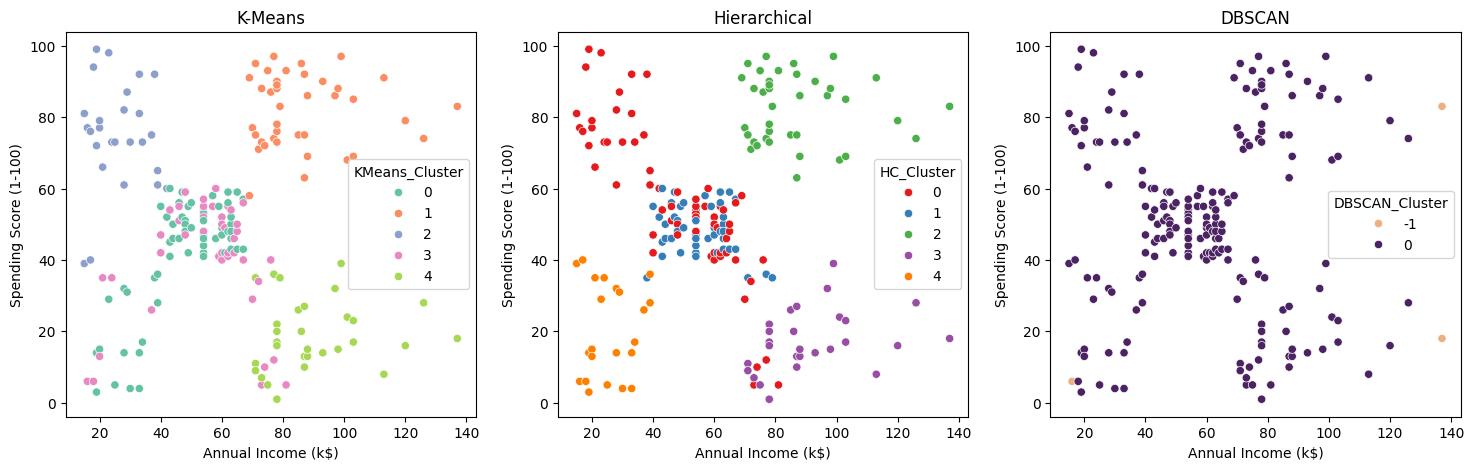

In [ ]:
print("\nCluster Comparison Summary:")
print(Mall_Coustumer[['KMeans_Cluster', 'HC_Cluster', 'DBSCAN_Cluster']].head())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(ax=axes[0], x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=Mall_Coustumer['KMeans_Cluster'], palette='Set2')
axes[0].set_title("K-Means")

sns.scatterplot(ax=axes[1], x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=Mall_Coustumer['HC_Cluster'], palette='Set1')
axes[1].set_title("Hierarchical")

sns.scatterplot(ax=axes[2], x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=Mall_Coustumer['DBSCAN_Cluster'], palette='flare')
axes[2].set_title("DBSCAN")
plt.show()

